IMPORT LIBRARIES

In [14]:
import gdal
import numpy as np
import matplotlib.pyplot as plt

READ DATA

In [15]:
ds = gdal.Open("./data/ortho/swir_ortho_standardized.tif")
data = ds.ReadAsArray()
print(data.shape)

(8, 653, 502)


In [16]:
fac_spectrum = np.load("./data/facility_spectrum_standardized.npy")
print(fac_spectrum)

[-1.0885812 -1.2930477 -1.332159  -1.4038044 -1.4691548 -1.4204603
 -1.4525424 -1.3587732]


PREPROCESS DATA

In [17]:
data = data.swapaxes(0,2).swapaxes(0, 1)
print(data.shape)

(653, 502, 8)


FINDING COSINE SIMILARITY

In [18]:
def find_cos_sim(data, fac_spectrum):
    ans = np.dot(data, fac_spectrum)
    data_norm = np.linalg.norm(data, axis=2)
    fac_spectrum_norm = np.linalg.norm(fac_spectrum)
    ans = np.divide(ans,data_norm*fac_spectrum_norm)
    return ans

PLOT GRAPH OF COSINE SIMILARITY

In [19]:
def plot_graph(ans, img_name):
    cos = plt.plot(ans)
    img_path = "./data/ortho/" + img_name
    plt.savefig(img_path)
    plt.show(cos)

FIND COSINE SIMILARITY BETWEEN DATA AND FACILITY SPECTRUM AND PLOT IT

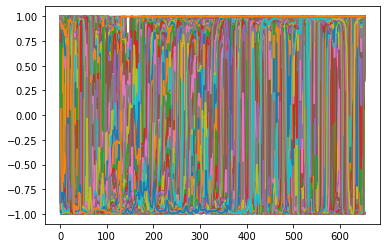

In [20]:
ans = find_cos_sim(data, fac_spectrum)
np.save("./data/ortho/ans.npy", ans)
plot_graph(ans, "img1.jpg")

CREATE A MASK ARRAY

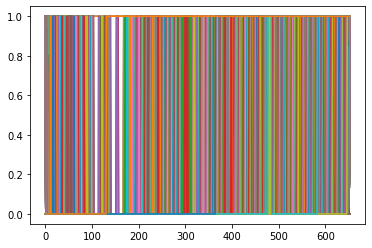

In [21]:
threshold = 0.995
masked_array = np.where(ans > threshold, 1, 0)
plot_graph(masked_array,  "img2.jpg")

LOAD 100 REFRENCE SPECTRA

In [22]:
full_spectrum = np.load("./data/ref_spectra_standardized.npy")
print(full_spectrum.shape)

(100, 8)


FIND COSIME SIMILARITY BETWEEN DATA AND 100 REFRENCE SPECTRA

In [23]:
full_ans = []
for i in range(len(full_spectrum)):
  full_ans.append(find_cos_sim(data, full_spectrum[i]))
full_ans = np.array(full_ans)
full_ans = full_ans.swapaxes(0,2).swapaxes(0,1)